In [1]:
import pandas as pd
df = pd.read_csv("data/RGS_raw_feedback.csv")
#print(df)

In [2]:
before_words = []
for a in df['Being a scientist means? Before'].fillna(''):
    before_words = before_words + a.split()
    
after_words = []
for a in df['Being a scientist means? After'].fillna(''):
    after_words = after_words + a.split()
    
#print(before_words)
#print(after_words)

In [3]:
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off")

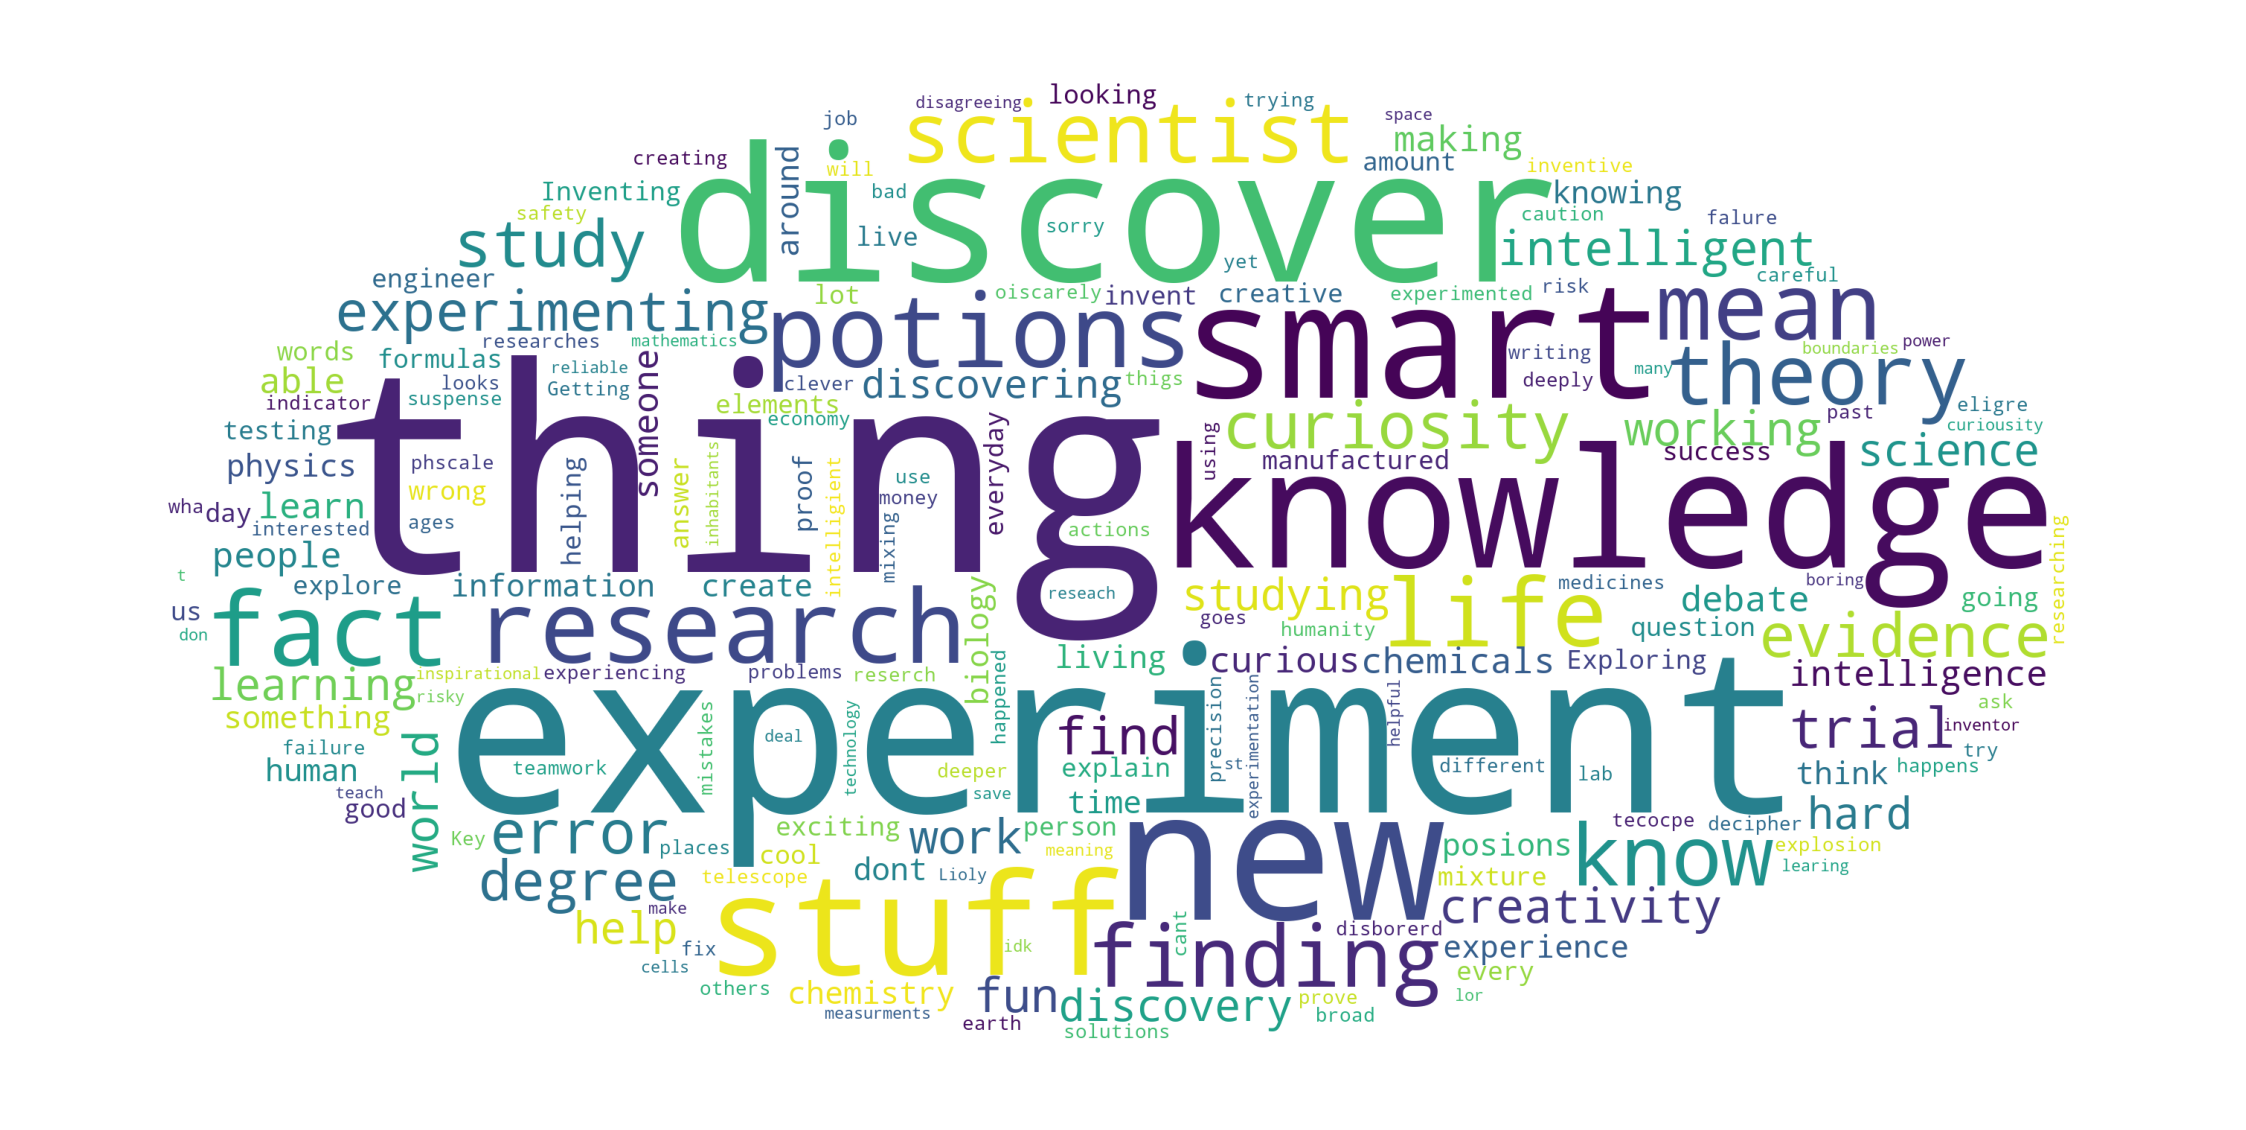

In [4]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np

x, y = np.ogrid[:3000, :3000]

mask = (x - 1500) ** 2 + (y - 1500) ** 2 > 1300 ** 2
mask = 255 * mask.astype(int)
mask = mask[::2,:]

wordcloud = WordCloud(width=3000,
                    height=2000,
                    random_state=1, 
                    background_color='white',
                    mask=mask,
                    colormap='viridis', 
                    collocations=False, 
                    stopwords=STOPWORDS)

wordcloud.generate(' '.join(before_words))

plot_cloud(wordcloud)

wordcloud.to_file("figures/RGS_words_before.png")

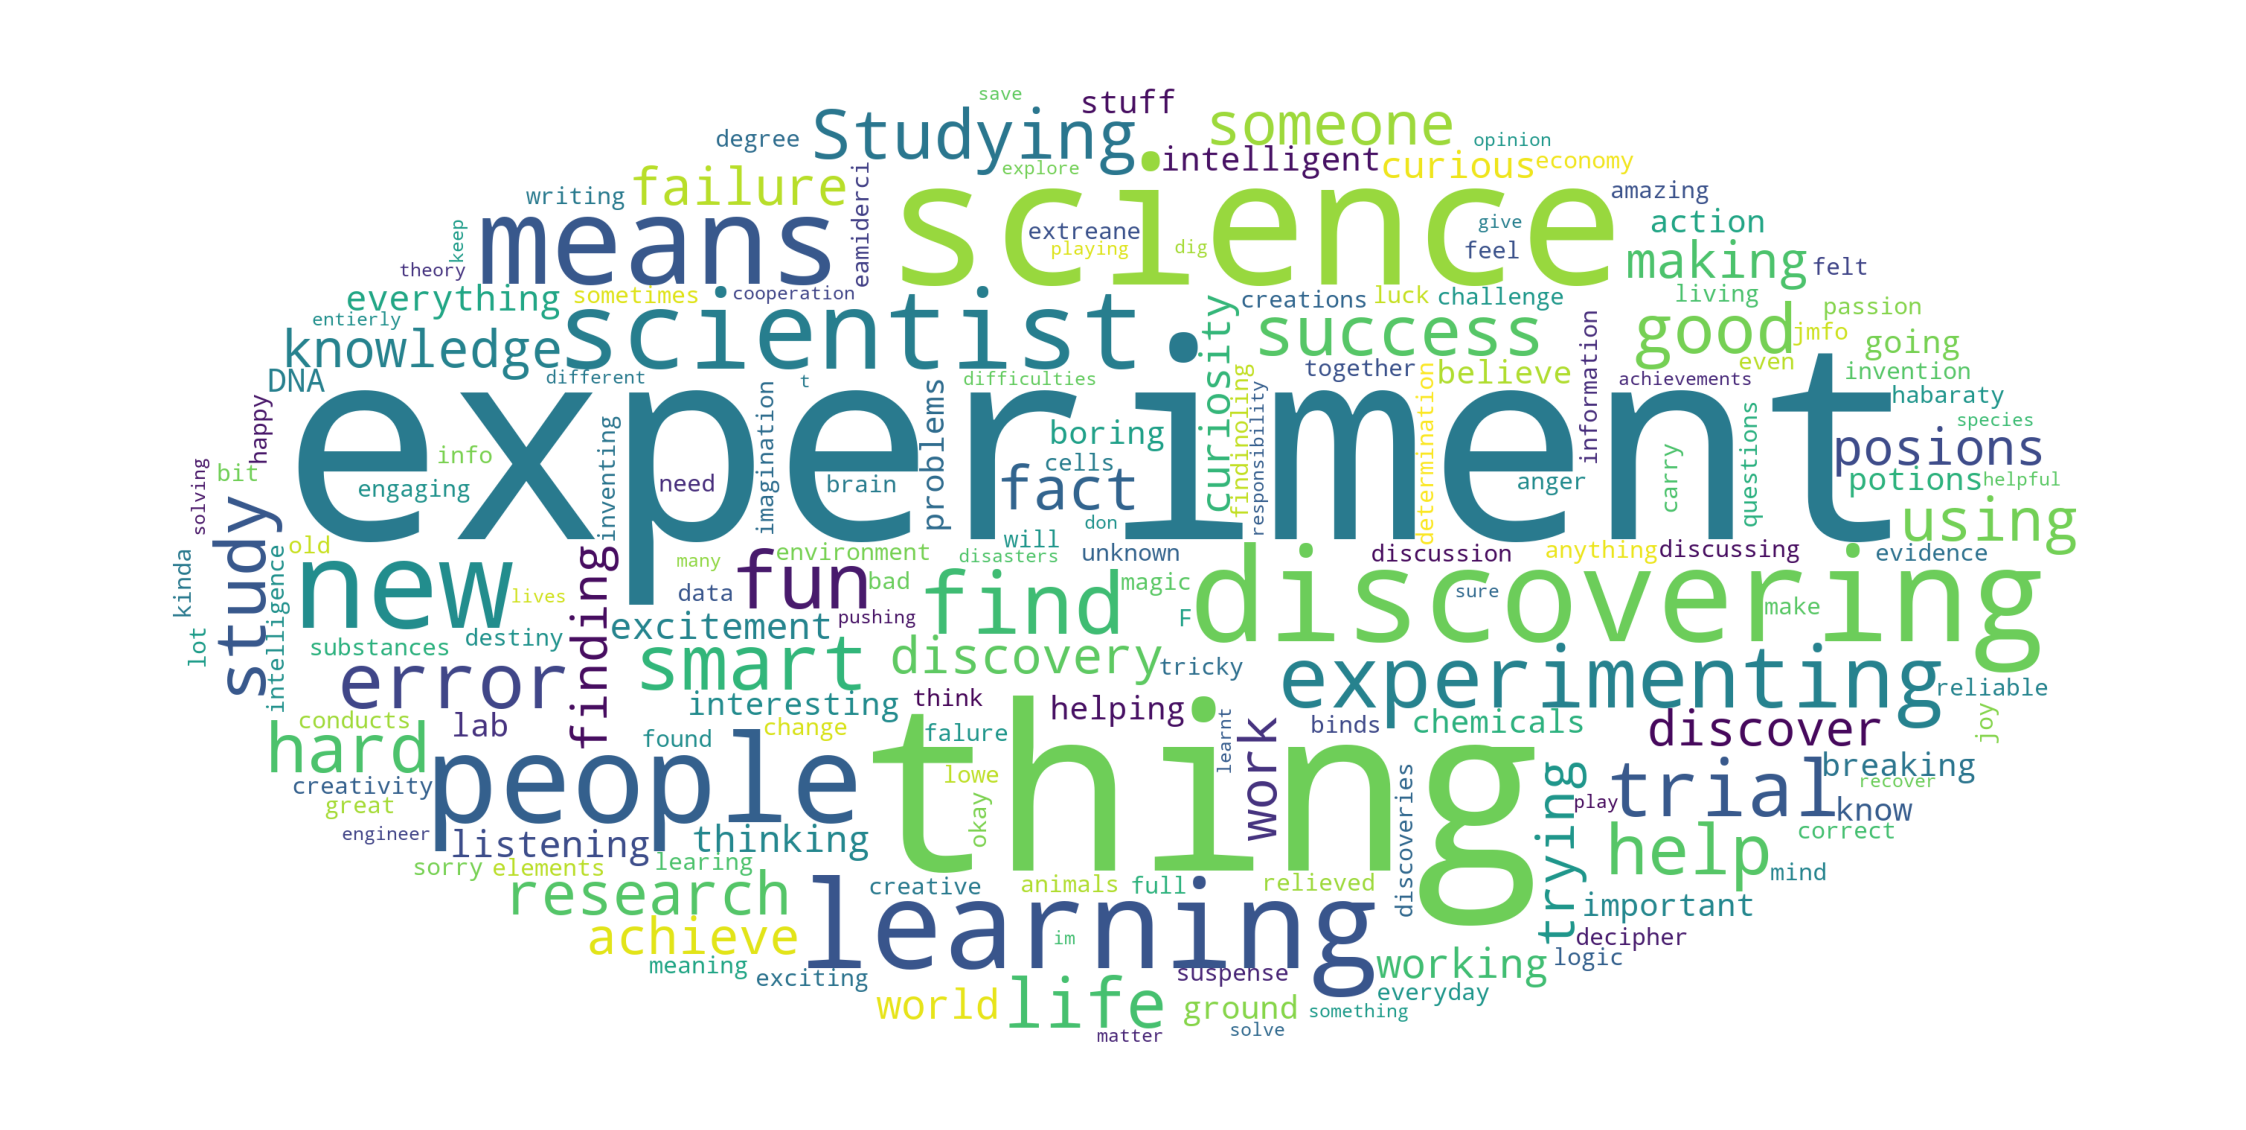

In [5]:
wordcloud.generate(' '.join(after_words))

plot_cloud(wordcloud)

wordcloud.to_file("figures/RGS_words_after.png")